In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from matplotlib import pyplot
from scipy.optimize import least_squares

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
data = pd.read_csv("train.csv")
data["win"] = data["team_score"] > data["opponent_team_score"]
data["diff"] = data["team_score"] - data["opponent_team_score"]

teams = data["team"].unique().tolist()
data["team_id"] = data["team"].apply(lambda x: teams.index(x))
data["opponent_team_id"] = data.groupby("game_id")["team_id"].transform("sum") - data["team_id"]

### Least Squares

In [59]:
def fit_opr_dpr(games, num_teams):
    """
    Solve for the Offensive Power Rating (OPR) and Defensive Power Rating (DPR) for each team.
    
    :param games: List of tuples (team_A, team_B, score_A, score_B)
    :param num_teams: Total number of teams
    :return: OPR and DPR arrays
    """
    params = np.zeros(2 * num_teams)
    
    def loss_function(x):
        opr = x[:num_teams]
        dpr = x[num_teams:]
        residuals = []
        
        for team_A, team_B, score_A, score_B in games:
            pred_A = opr[team_A] - dpr[team_B]
            pred_B = opr[team_B] - dpr[team_A]
            residuals.append(pred_A - score_A)
            residuals.append(pred_B - score_B)
        
        return np.array(residuals)
    
    return least_squares(loss_function, params)

In [60]:
games = data[["team_id", "opponent_team_id", "team_score", "opponent_team_score"]].to_numpy()

In [ ]:
result = fit_opr_dpr(games, len(teams))

In [67]:
import pickle
with open("result.pkl", "wb") as f:
    pickle.dump(result, f)

In [87]:
scores = result.x - result.x.min()

In [93]:
data["team_score"].max()

137

### Correlation stuff

In [ ]:
data = pd.read_csv("train.csv")
data["win"] = data["team_score"] == data.groupby("game_id")["team_score"].transform("max")
data["diff"] = 2*data["team_score"] - data.groupby("game_id")["team_score"].transform("sum")



corr = data.corr()
corr.iloc[0, 0] = -1

# corr[corr > 0.3] = 1
# corr[corr < -0.3] = -1

<AxesSubplot:>

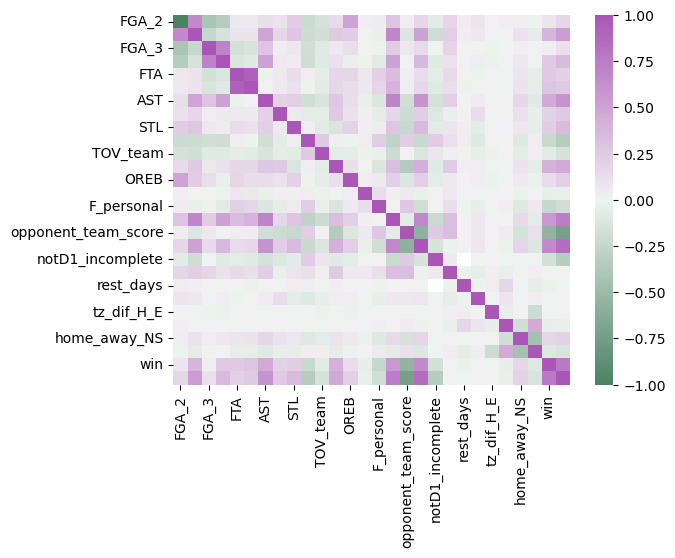

In [ ]:
sns.heatmap(corr, cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True))

In [ ]:
data.corr().loc["win"].sort_values(key=lambda x: -abs(x))

win                    1.000
diff                   0.772
largest_lead           0.658
team_score             0.566
opponent_team_score   -0.566
AST                    0.460
DREB                   0.410
FGM_2                  0.387
FTM                    0.293
FTA                    0.262
FGM_3                  0.254
F_personal            -0.245
TOV                   -0.232
STL                    0.229
BLK                    0.205
home_away_NS           0.175
notD1_incomplete      -0.168
OREB                   0.126
travel_dist           -0.101
FGA_2                  0.084
TOV_team              -0.074
F_tech                -0.033
prev_game_dist        -0.032
FGA_3                  0.030
rest_days             -0.017
attendance            -0.000
tz_dif_H_E            -0.000
OT_length_min_tot     -0.000
Name: win, dtype: float64

<AxesSubplot:xlabel='rest_days', ylabel='diff'>

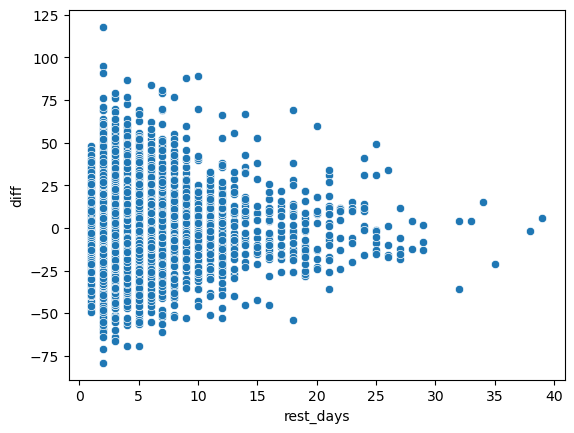

In [ ]:
sns.scatterplot(x=data["rest_days"], y=data["diff"])

In [ ]:
data.corr()

,FGA_2,FGM_2,FGA_3,FGM_3,FTA,FTM,AST,BLK,STL,TOV,...,notD1_incomplete,OT_length_min_tot,rest_days,attendance,tz_dif_H_E,prev_game_dist,home_away_NS,travel_dist,win,diff
FGA_2,1.000,0.667,-0.419,-0.348,0.066,0.047,0.118,0.109,0.236,-0.215,...,-0.074,0.181,0.036,0.084,0.000,0.023,0.031,-0.011,0.084,0.175
FGM_2,0.667,1.000,-0.244,-0.142,0.093,0.094,0.488,0.164,0.275,-0.208,...,-0.188,0.220,0.019,0.064,0.015,0.005,0.096,-0.057,0.387,0.546
FGA_3,-0.419,-0.244,1.000,0.718,-0.167,-0.137,0.286,0.027,0.063,-0.186,...,-0.002,0.184,0.001,-0.001,-0.014,0.010,0.024,0.015,0.030,0.115
FGM_3,-0.348,-0.142,0.718,1.000,-0.124,-0.083,0.514,0.048,0.045,-0.192,...,-0.079,0.099,-0.005,0.025,-0.019,0.004,0.068,-0.002,0.254,0.354
FTA,0.066,0.093,-0.167,-0.124,1.000,0.923,-0.017,0.057,0.132,0.033,...,-0.056,0.151,0.002,-0.008,0.010,-0.006,0.086,-0.042,0.262,0.214
FTM,0.047,0.094,-0.137,-0.083,0.923,1.000,0.012,0.050,0.106,-0.009,...,-0.081,0.123,-0.018,0.002,0.007,-0.004,0.093,-0.043,0.293,0.252
AST,0.118,0.488,0.286,0.514,-0.017,0.012,1.000,0.201,0.222,-0.184,...,-0.164,0.222,0.002,0.043,-0.004,0.000,0.178,-0.079,0.460,0.605
BLK,0.109,0.164,0.027,0.048,0.057,0.050,0.201,1.000,0.056,-0.059,...,-0.101,-0.027,0.016,0.127,-0.004,0.004,0.108,-0.037,0.205,0.257
STL,0.236,0.275,0.063,0.045,0.132,0.106,0.222,0.056,1.000,0.021,...,-0.063,0.084,0.037,-0.061,0.005,0.013,0.074,-0.045,0.229,0.349
TOV,-0.215,-0.208,-0.186,-0.192,0.033,-0.009,-0.184,-0.059,0.021,1.000,...,0.240,0.113,0.024,-0.088,0.003,0.002,-0.088,0.033,-0.232,-0.350
